In [1]:
# import pandas and numpy
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Loading data and printing first few rows
train = pd.read_csv('file:///Users/mac/Downloads/train_titanic.csv')
test = pd.read_csv('file:///Users/mac/Downloads/test_titanic.csv')
# Previewing the statistics of training data and test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# print the names of the columns in the data frame
print("In Training Data missing, columns with missing values:")
# Retain columns that are of interest and discard the rest (such as Id, Name, Cabin, and Ticket number)
newcols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked']
train = train[newcols]
# Check which columns have missing data
for column in train.columns:
    if np.any(pd.isnull(train[column])) == True:
        print(column) 

In Training Data missing, columns with missing values:
Age
Embarked


In [3]:
# print the names of the columns in the data frame
print("In test Data missing, columns with missing values:")
# Retain columns that are of interest and discard the rest (\Name, Cabin and Ticket number)
newcols = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
test = test[newcols]
# Check which columns have missing data
for column in test.columns:
    if np.any(pd.isnull(test[column])) == True:
        print(column)

In test Data missing, columns with missing values:
Age
Fare


In [4]:
# Filling missing age data with median values
train["Age"] = train["Age"].fillna(train["Age"].median())

# data cleaning for Embarked
print (train["Embarked"].unique())
print (train.Embarked.value_counts())
train["Embarked"] = train["Embarked"].fillna('S')

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [5]:
# Filling missing age data with median values of trainging set
test["Age"] = test["Age"].fillna(train["Age"].median())

# filling fare data with median of training set
test["Fare"] = test["Fare"].fillna(train["Fare"].median())

In [6]:
for df in [train, test]:
    df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

def filter_family_size(x):
    if x == 1:
        return 'Solo'
    elif x < 4:
        return 'Small'
    else:
        return 'Big'

for df in [train, test]:
    df['FamilySize'] = df['FamilySize'].apply(filter_family_size)

In [7]:
# matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.rcParams.update({'font.size': 22})

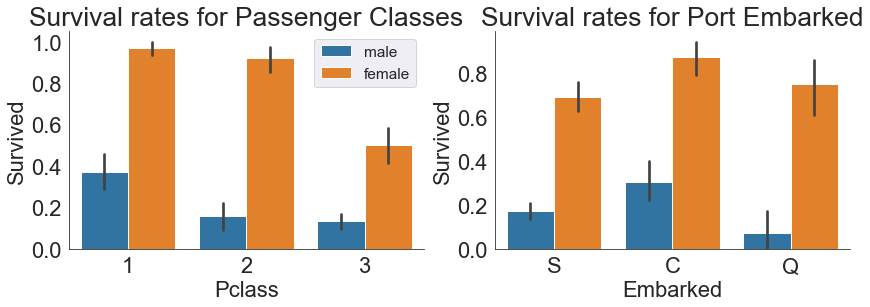

In [8]:
# Check with Pclass and Embarked
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.set_title('Survival rates for Passenger Classes')
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train, ax=ax1)

ax2.set_title('Survival rates for Port Embarked')
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train, ax=ax2)
sns.despine()
sns.set(font_scale=1.4)
ax2.legend_.remove()
ax1.legend(loc='upper right')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


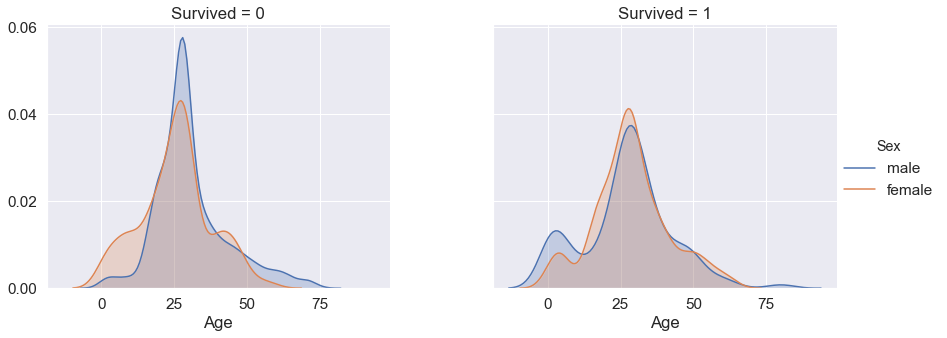

In [9]:
# Check with Age
g = sns.FacetGrid(train, col="Survived", hue='Sex', size=5, aspect = 1.2)
g.map(sns.kdeplot, "Age", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.despine()
sns.set(font_scale=2)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


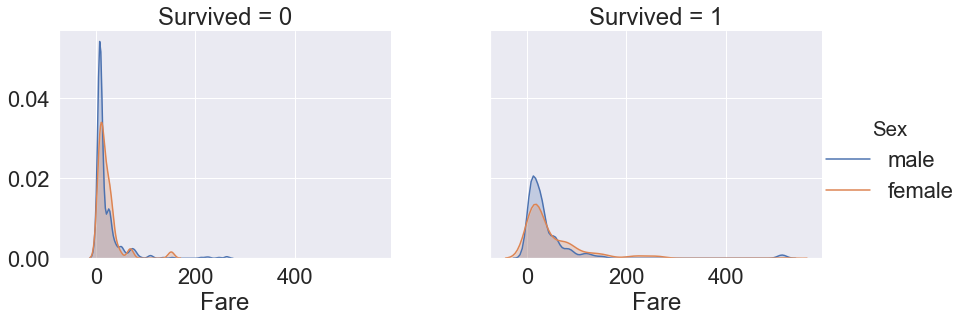

In [10]:
# Check with Fare
g = sns.FacetGrid(train, col="Survived", hue='Sex', size=5, aspect = 1.2)
g.map(sns.kdeplot, "Fare", shade=True).add_legend().fig.subplots_adjust(wspace=.3)
sns.set(font_scale=2)
sns.despine()
plt.show()

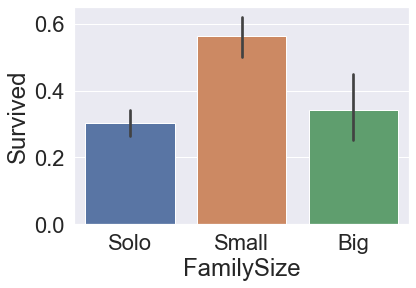

In [11]:
# Family Size
sns.barplot(x='FamilySize', y='Survived' , data=train, order = ['Solo', 'Small', 'Big'])
sns.set(font_scale=1.5)
plt.show()

In [12]:
# Convert to numeric values
train.loc[train["Embarked"] == 'S', "Embarked"] = 0
train.loc[train["Embarked"] == 'C', "Embarked"] = 1
train.loc[train["Embarked"] == 'Q', "Embarked"] = 2

test.loc[test["Embarked"] == 'S', "Embarked"] = 0
test.loc[test["Embarked"] == 'C', "Embarked"] = 1
test.loc[test["Embarked"] == 'Q', "Embarked"] = 2

In [13]:
# convert female/male to numeric values (male=0, female=1)
train.loc[train["Sex"]=="male","Sex"]=0
train.loc[train["Sex"]=="female","Sex"]=1

test.loc[test["Sex"]=="male","Sex"]=0
test.loc[test["Sex"]=="female","Sex"]=1

In [14]:
# convert family size to numeric values

train.loc[train["FamilySize"] == 'Solo', "FamilySize"] = 0
train.loc[train["FamilySize"] == 'Small', "FamilySize"] = 1
train.loc[train["FamilySize"] == 'Big', "FamilySize"] = 2

test.loc[test["FamilySize"] == 'Solo', "FamilySize"] = 0
test.loc[test["FamilySize"] == 'Small', "FamilySize"] = 1
test.loc[test["FamilySize"] == 'Big', "FamilySize"] = 2

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# columns we'll use to predict outcome
features = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']
label = 'Survived'

# instantiate the model
logreg = LogisticRegression()

# perform cross-validation
print(cross_val_score(logreg, train[features], train[label], cv=10, scoring='accuracy').mean())

0.7957303370786517


In [18]:
# Apply our prediction to test data
logreg.fit(train[features], train[label])
prediction = logreg.predict(test[features])

# Create a new dataframe with only the columns Kaggle wants from the dataset
submission_DF = pd.DataFrame({ 
    "PassengerId" : test["PassengerId"],
    "Survived" : prediction
    })
print(submission_DF.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [19]:
# prepare file for submission
submission_DF.to_csv("titanic_Disaster.csv", index=False)